In [1]:
# 三分类问题：模型会输出每个类别的概率

logits = [0.6, -3.6, 18.9] #模型原始输出
#把原始输出，模拟成概率
'''
sigmoid 二分类问题
softmax 多分类问题
'''

'\nsigmoid 二分类问题\nsoftmax 多分类问题\n'

In [2]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
sigmoid(100)

1.0

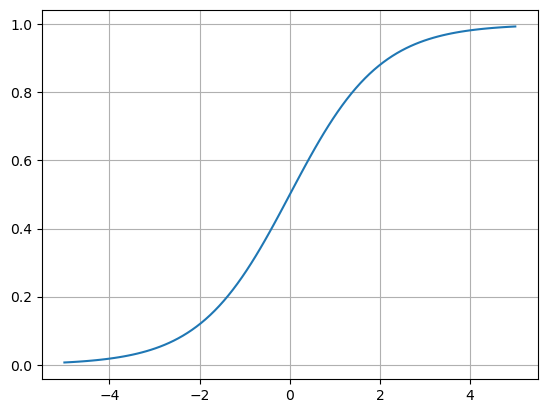

In [11]:
from matplotlib import pyplot as plt

x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x))
plt.grid(True)

In [22]:
def softmax(x):
    x = np.array(x)
    return np.exp(x) / np.sum(np.exp(x), axis=0)

## one-hot编码/独热编码
### 定义
是一个状态编码，适合用于表示离散量
特征编码时可以使用，比如，在自动驾驶中，左转，右转，直行可以表示为：
* left [1, 0 ,0]
* right [0, 1, 0]
* straight [0, 0, 1]
标签编码时，有三种花，0，1，2:
* [1, 0 ,0]
* [0, 1, 0]
* [0, 0, 1]
特点：
* 它们是互相垂直的变量，没有先验的远近关系
* 都是比较长的向量，跟类别数量一致
* 每个向量只有一位是1，其余都是0，这种特征称为高度稀疏
神经网络中，n_classes的类别预测问题
* 模型会输出n_classes个概率

## 交叉熵`Cross Entropy`
* 作用：从概率分布的角度来衡量两个概率的远近程度
* 计算过程：
    * y_true:第2类，索引为1
    * y_pred_1 [12.5, -0.5, 2.7]
    * y_pred_2 [-12.5, 6.4 2.7]

In [27]:
y_true = [0, 1, 0] #使用one-hot对类别进行编码
y_true = np.array(y_true)

In [28]:
# 第一次预测
y_pred_1 = [12.5, -0.5, 2.7]
y_pred_1 = np.array(y_pred_1)
y_pred_1 = softmax(y_pred_1)
y_pred_1

array([9.99942291e-01, 2.26019897e-06, 5.54483994e-05])

In [34]:
# 交叉熵
loss1 = -(np.log(2.26019897e-06))
loss1

13.00005770873235

In [36]:
y_pred_2 = softmax([-12.5, 6.4, 2.7])

In [37]:
y_pred_2

array([6.04265198e-09, 9.75872973e-01, 2.41270213e-02])

In [38]:
loss2 = -(np.log(9.75872973e-01))

In [39]:
loss2

0.024422851654124902

## 激活函数
### 常见的激活函数

#### 1. sigmoid
（0，1）有渐近线线有激活死区
#### 2. Tanh
（-1，1）有渐近线，有激活死区
#### 3. ReLu
* Rectified Linear Unit 修正线性单元
*  `>= 0` 原样输出
* `< 0`置为0